In [55]:
# https:/onepagecode.substack.com
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [1]:
# https:/onepagecode.substack.com
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# https:/onepagecode.substack.com
datapath = './daily'
filepath = os.path.join(datapath,os.listdir('./daily')[0])

In [3]:
# https:/onepagecode.substack.com
import re
ticker_regex = re.compile('.+_(?P<ticker>.+)\.csv')
get_ticker =lambda x :ticker_regex.match(x).groupdict()['ticker']
print(filepath,get_ticker(filepath))

./daily/table_tel.csv tel


In [4]:
# https:/onepagecode.substack.com
ret = lambda x,y: log(y/x) #Log return 
zscore = lambda x:(x -x.mean())/x.std() # zscore

In [5]:
# https:/onepagecode.substack.com
D = pd.read_csv(filepath,header=None,names=['UNK','o','h','l','c','v']) #Load the dataframe with headers

In [6]:
# https:/onepagecode.substack.com
D.head() #Lets peack at it

UNK        o        h        l        c            v
20070702    0  34.1445  35.3901  33.9529  34.8065  1834373.873
20070703    0  34.8239  35.3726  34.0400  34.5452  4143385.114
20070705    0  34.4929  34.8413  34.1793  34.5365  4521413.667
20070706    0  34.3187  34.7716  33.7961  34.6410  4021547.844
20070709    0  34.4493  35.1462  33.5173  35.0329  5388421.001

In [7]:
# https:/onepagecode.substack.com
def make_inputs(filepath):
    D = pd.read_csv(filepath,header=None,names=['UNK','o','h','l','c','v']) #Load the dataframe with headers
    D.index = pd.to_datetime(D.index,format='%Y%m%d') # Set the indix to a datetime
    Res = pd.DataFrame()
    ticker = get_ticker(filepath)

    Res['c_2_o'] = zscore(ret(D.o,D.c))
    Res['h_2_o'] = zscore(ret(D.o,D.h))
    Res['l_2_o'] = zscore(ret(D.o,D.l))
    Res['c_2_h'] = zscore(ret(D.h,D.c))
    Res['h_2_l'] = zscore(ret(D.h,D.l))
    Res['c1_c0'] = ret(D.c,D.c.shift(-1)).fillna(0) #Tommorows return 
    Res['vol'] = zscore(D.v)
    Res['ticker'] = ticker
    return Res
Res = make_inputs(filepath)

In [8]:
# https:/onepagecode.substack.com
Res.head() # Lets look at what we got

c_2_o     h_2_o     l_2_o     c_2_h     h_2_l     c1_c0  \
2007-07-02  0.801355  1.210723  0.538772 -0.151655 -0.534522 -0.007536   
2007-07-03 -0.424752 -0.005068 -0.519118 -0.613751 -0.390993 -0.000252   
2007-07-05 -0.006181 -0.341182  0.322381  0.362967  0.511406  0.003021   
2007-07-06  0.357732 -0.156944 -0.060999  0.692674  0.076016  0.011250   
2007-07-09  0.693154  0.259451 -0.806687  0.727729 -0.816114 -0.031057   

                 vol ticker  
2007-07-02 -0.423611    tel  
2007-07-03  0.698563    tel  
2007-07-05  0.882284    tel  
2007-07-06  0.639351    tel  
2007-07-09  1.303648    tel

In [9]:
# https:/onepagecode.substack.com
Res.corr() #Quick check to see we didn't mess it up. All values should be different, otherwise we repeated a variable

c_2_o     h_2_o     l_2_o     c_2_h     h_2_l     c1_c0       vol
c_2_o  1.000000  0.727980  0.646456  0.664281 -0.076033  0.008279  0.011871
h_2_o  0.727980  1.000000  0.157799 -0.028889 -0.659993  0.007359  0.300114
l_2_o  0.646456  0.157799  1.000000  0.770473  0.637713  0.010860 -0.321847
c_2_h  0.664281 -0.028889  0.770473  1.000000  0.608713  0.004047 -0.309896
h_2_l -0.076033 -0.659993  0.637713  0.608713  1.000000  0.002522 -0.478965
c1_c0  0.008279  0.007359  0.010860  0.004047  0.002522  1.000000 -0.017168
vol    0.011871  0.300114 -0.321847 -0.309896 -0.478965 -0.017168  1.000000

In [10]:
# https:/onepagecode.substack.com
Final = pd.DataFrame()
for f in os.listdir(datapath):
    filepath = os.path.join(datapath,f)
    if filepath.endswith('.csv'):
        Res = make_inputs(filepath)
        Final = Final.append(Res)

In [11]:
# https:/onepagecode.substack.com
Final.head()

c_2_o     h_2_o     l_2_o     c_2_h     h_2_l     c1_c0  \
2007-07-02  0.801355  1.210723  0.538772 -0.151655 -0.534522 -0.007536   
2007-07-03 -0.424752 -0.005068 -0.519118 -0.613751 -0.390993 -0.000252   
2007-07-05 -0.006181 -0.341182  0.322381  0.362967  0.511406  0.003021   
2007-07-06  0.357732 -0.156944 -0.060999  0.692674  0.076016  0.011250   
2007-07-09  0.693154  0.259451 -0.806687  0.727729 -0.816114 -0.031057   

                 vol ticker  
2007-07-02 -0.423611    tel  
2007-07-03  0.698563    tel  
2007-07-05  0.882284    tel  
2007-07-06  0.639351    tel  
2007-07-09  1.303648    tel

In [12]:
# https:/onepagecode.substack.com
pivot_columns = Final.columns[:-1]
P = Final.pivot_table(index=Final.index,columns='ticker',values=pivot_columns) # Make a pivot table from the data

In [13]:
# https:/onepagecode.substack.com
P.head()

c_2_o                                                             \
ticker         a        aa      aapl abbv       abc       abt       ace acn   
1998-01-02   NaN -0.017649  6.991394  NaN  0.047250  1.845516 -0.601609 NaN   
1998-01-05   NaN  0.373488 -1.224062  NaN -0.160945  0.031659 -0.234577 NaN   
1998-01-06   NaN -0.718569  6.857266  NaN -1.102853 -0.473164  0.452262 NaN   
1998-01-07   NaN  0.980669 -3.007557  NaN  0.553079  0.746779  0.137372 NaN   
1998-01-08   NaN -1.828950  1.388888  NaN  0.488170 -0.221620 -0.484264 NaN   

                               ...       vol                                \
ticker           act      adbe ...        xl      xlnx       xom      xray   
1998-01-02 -0.911471 -0.375461 ... -0.676802  1.391497 -1.045626 -1.147952   
1998-01-05  2.090086  0.791331 ... -0.621025  1.019607 -0.615370 -0.556684   
1998-01-06 -1.239961  1.451409 ... -0.634169  0.020195 -0.527923 -1.131583   
1998-01-07 -0.878292 -0.534781 ... -0.616242  1.023705 -0.134130 -0.329006   
1998-01-08  1.300492  0.538778 ... -0.655003  0.645285 -0.907375 -1.066107   

                                                            
ticker           xrx xyl      yhoo       yum      zion zmh  
1998-01-02 -0.817355 NaN -0.368713 -0.678763 -0.724482 NaN  
1998-01-05 -0.757660 NaN  0.064841  0.980283 -0.735275 NaN  
1998-01-06 -0.629732 NaN  0.150071  1.697887 -0.683202 NaN  
1998-01-07 -0.504232 NaN -0.463651  0.515268 -0.635858 NaN  
1998-01-08 -0.560549 NaN -0.157777  0.235907 -0.605092 NaN  

[5 rows x 3500 columns]

In [14]:
# https:/onepagecode.substack.com
mi = P.columns.tolist()

In [15]:
# https:/onepagecode.substack.com
new_ind = pd.Index(e[1] +'_' + e[0] for e in mi)

In [16]:
# https:/onepagecode.substack.com
P.columns = new_ind
P = P.sort(axis=1) # Sort by columns

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


In [17]:
# https:/onepagecode.substack.com
P.head()

a_c1_c0  a_c_2_h  a_c_2_o  a_h_2_l  a_h_2_o  a_l_2_o  a_vol  \
1998-01-02      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-05      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-06      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-07      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-08      NaN      NaN      NaN      NaN      NaN      NaN    NaN   

            aa_c1_c0  aa_c_2_h  aa_c_2_o   ...     zion_h_2_o  zion_l_2_o  \
1998-01-02  0.017390  0.670259 -0.017649   ...       0.246401    0.710284   
1998-01-05 -0.022601  0.462520  0.373488   ...       0.127875    0.710284   
1998-01-06  0.001693 -0.088471 -0.718569   ...      -0.677287   -1.264514   
1998-01-07 -0.042290  1.002099  0.980669   ...      -0.677287   -1.175835   
1998-01-08 -0.024094 -2.074267 -1.828950   ...      -0.202411   -2.278200   

            zion_vol  zmh_c1_c0  zmh_c_2_h  zmh_c_2_o  zmh_h_2_l  zmh_h_2_o  \
1998-01-02 -0.724482        NaN        NaN        NaN        NaN        NaN   
1998-01-05 -0.735275        NaN        NaN        NaN        NaN        NaN   
1998-01-06 -0.683202        NaN        NaN        NaN        NaN        NaN   
1998-01-07 -0.635858        NaN        NaN        NaN        NaN        NaN   
1998-01-08 -0.605092        NaN        NaN        NaN        NaN        NaN   

            zmh_l_2_o  zmh_vol  
1998-01-02        NaN      NaN  
1998-01-05        NaN      NaN  
1998-01-06        NaN      NaN  
1998-01-07        NaN      NaN  
1998-01-08        NaN      NaN  

[5 rows x 3500 columns]

In [18]:
# https:/onepagecode.substack.com
clean_and_flat = P.dropna(1)

In [19]:
# https:/onepagecode.substack.com
target_cols = list(filter(lambda x: 'c1_c0' in x, clean_and_flat.columns.values))
input_cols  = list(filter(lambda x: 'c1_c0' not in x, clean_and_flat.columns.values))

In [20]:
# https:/onepagecode.substack.com
InputDF = clean_and_flat[input_cols][:3900]
TargetDF = clean_and_flat[target_cols][:3900]

In [21]:
# https:/onepagecode.substack.com
corrs = TargetDF.corr()

In [22]:
# https:/onepagecode.substack.com
num_stocks = len(TargetDF.columns)

In [23]:
# https:/onepagecode.substack.com
TotalReturn = ((1-exp(TargetDF)).sum(1))/num_stocks # If i put one dollar in each stock at the close, this is how much I'd get back

In [429]:
# https:/onepagecode.substack.com
def labeler(x):
    if x>0.0029:
        return 1
    if x<-0.00462:
        return -1
    else:
        return 0

In [520]:
# https:/onepagecode.substack.com
Labeled = pd.DataFrame()
Labeled['return'] = TotalReturn
Labeled['class'] = TotalReturn.apply(labeler,1)
Labeled['multi_class'] = pd.qcut(TotalReturn,11,labels=range(11))

In [483]:
# https:/onepagecode.substack.com
pd.qcut(TotalReturn,5).unique()

[(-0.00301, 0.00119], (0.00741, 0.0999], (0.00119, 0.00741], [-0.108, -0.00877], (-0.00877, -0.00301]]
Categories (5, object): [[-0.108, -0.00877] < (-0.00877, -0.00301] < (-0.00301, 0.00119] < (0.00119, 0.00741] < (0.00741, 0.0999]]

In [477]:
# https:/onepagecode.substack.com
def labeler_multi(x):
    if x>0.0029:
        return 1
    if x<-0.00462:
        return -1
    else:
        return 0

In [431]:
# https:/onepagecode.substack.com
Labeled['class'].value_counts()

 1    1301
 0    1301
-1    1298
Name: class, dtype: int64

In [631]:
# https:/onepagecode.substack.com
Labeled['act_return'] = Labeled['class'] * Labeled['return']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefaad46080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fefaae84320>], dtype=object)

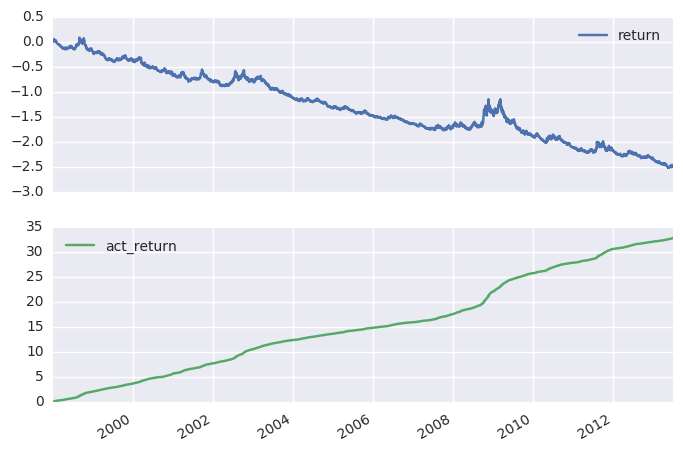

In [533]:
# https:/onepagecode.substack.com
Labeled[['return','act_return']].cumsum().plot(subplots=True)

In [627]:
# https:/onepagecode.substack.com
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

In [628]:
# https:/onepagecode.substack.com
test_size=600

In [629]:
# https:/onepagecode.substack.com
res = logreg.fit(InputDF[:-test_size],Labeled['multi_class'][:-test_size])

In [632]:
# https:/onepagecode.substack.com
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Labeled['multi_class'][-test_size:],res.predict(InputDF[-test_size:])))
print(confusion_matrix(Labeled['multi_class'][-test_size:],res.predict(InputDF[-test_size:])))

             precision    recall  f1-score   support

          0       0.18      0.04      0.06        52
          1       0.07      0.06      0.06        50
          2       0.08      0.15      0.10        60
          3       0.15      0.13      0.14        62
          4       0.08      0.06      0.07        50
          5       0.06      0.12      0.08        51
          6       0.13      0.20      0.16        60
          7       0.05      0.04      0.04        53
          8       0.06      0.06      0.06        54
          9       0.11      0.07      0.09        56
         10       0.00      0.00      0.00        52

avg / total       0.09      0.09      0.08       600

[[ 2  3 11  6  1  7  7  3  3  4  5]
 [ 2  3  8  7  8  7  6  2  2  2  3]
 [ 1  4  9  5  2 13  5 11  5  3  2]
 [ 1  6  7  8  5 15  6  1  7  4  2]
 [ 1  3  6  2  3  9 10  5  7  4  0]
 [ 0  5 11  3  3  6  6  4  5  6  2]
 [ 1  3 15  3  3 12 12  1  4  2  4]
 [ 0  4  8  3  3  8 12  2 10  3  0]
 [ 0  2 16  6  3  9 

In [642]:
# https:/onepagecode.substack.com
Labeled['predicted_action'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,res.predict(InputDF)))
print(confusion_matrix(Labeled['class'][-test_size:],Labeled['predicted_action'][-test_size:]))

[[91 37 75]
 [76 35 89]
 [92 30 75]]


In [638]:
# https:/onepagecode.substack.com
Labeled['pred_return'] = Labeled['predicted_action'] * Labeled['return']

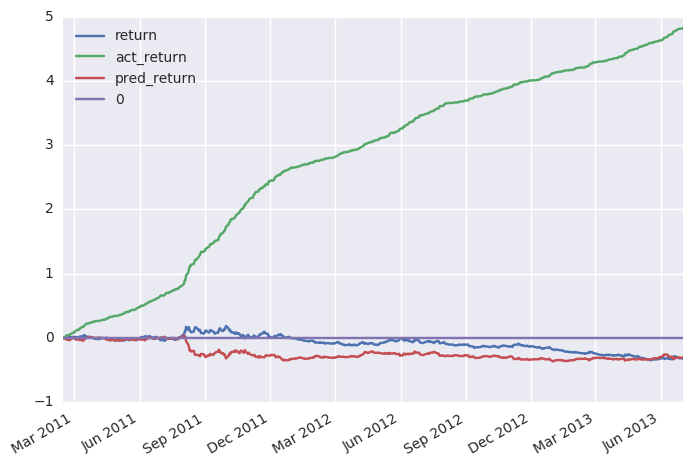

In [639]:
# https:/onepagecode.substack.com
Res = Labeled[-test_size:][['return','act_return','pred_return']].cumsum()
Res[0] =0
Res.plot()

In [521]:
# https:/onepagecode.substack.com
import tensorflow as tf
from  tensorflow.contrib.learn.python.learn.estimators.dnn  import DNNClassifier
from tensorflow.contrib.layers import real_valued_column

In [663]:
# https:/onepagecode.substack.com
Labeled['tf_class'] = Labeled['multi_class']
num_features = len(InputDF.columns)
dropout=0.2
hidden_1_size = 1000
hidden_2_size = 250
num_classes = Labeled.tf_class.nunique()
NUM_EPOCHS=100
BATCH_SIZE=50
lr=0.0001

In [655]:
# https:/onepagecode.substack.com
train = (InputDF[:-test_size].values,Labeled.tf_class[:-test_size].values)
val = (InputDF[-test_size:].values,Labeled.tf_class[-test_size:].values)
NUM_TRAIN_BATCHES = int(len(train[0])/BATCH_SIZE)
NUM_VAL_BATCHES = int(len(val[1])/BATCH_SIZE)

In [293]:
# https:/onepagecode.substack.com
len(InputDF)

3900

In [654]:
# https:/onepagecode.substack.com
class Model():
    def __init__(self):
        global_step = tf.contrib.framework.get_or_create_global_step()
        self.input_data = tf.placeholder(dtype=tf.float32,shape=[None,num_features])
        self.target_data = tf.placeholder(dtype=tf.int32,shape=[None])
        self.dropout_prob = tf.placeholder(dtype=tf.float32,shape=[])
        with tf.variable_scope("ff"):
            droped_input = tf.nn.dropout(self.input_data,keep_prob=self.dropout_prob)
            
            layer_1 = tf.contrib.layers.fully_connected(
                num_outputs=hidden_1_size,
                inputs=droped_input,
            )
            layer_2 = tf.contrib.layers.fully_connected(
                num_outputs=hidden_2_size,
                inputs=layer_1,
            )
            self.logits = tf.contrib.layers.fully_connected(
                num_outputs=num_classes,
                activation_fn =None,
                inputs=layer_2,
            )
        with tf.variable_scope("loss"):
            
            self.losses = tf.nn.sparse_softmax_cross_entropy_with_logits(self.logits,self.target_data)
            mask = (1-tf.sign(1-self.target_data)) #Don't give credit for flat days
            mask = tf.cast(mask,tf.float32)
            self.loss = tf.reduce_sum(self.losses)
        
        with tf.name_scope("train"):
          opt = tf.train.AdamOptimizer(lr)
          gvs = opt.compute_gradients(self.loss)
          self.train_op = opt.apply_gradients(gvs, global_step=global_step)
        
        with tf.name_scope("predictions"):
            self.probs = tf.nn.softmax(self.logits)
            self.predictions = tf.argmax(self.probs, 1)
            correct_pred = tf.cast(tf.equal(self.predictions, tf.cast(self.target_data,tf.int64)),tf.float64)
            self.accuracy = tf.reduce_mean(correct_pred)

In [664]:
# https:/onepagecode.substack.com
with tf.Graph().as_default():
    model = Model()
    input_ = train[0]
    target = train[1]
    with tf.Session() as sess:
        init = tf.initialize_all_variables()
        sess.run([init])
        epoch_loss =0
        for e in range(NUM_EPOCHS):
            if epoch_loss >0 and epoch_loss <1:
                break
            epoch_loss =0
            for batch in range(0,NUM_TRAIN_BATCHES):
                
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:input_[start:end],
                    model.target_data:target[start:end],
                    model.dropout_prob:0.9
                            }
                
                _,loss,acc = sess.run(
                    [
                        model.train_op,
                        model.loss,
                        model.accuracy,
                    ]
                    ,feed_dict=feed
                )
                epoch_loss+=loss
            print('step - {0} loss - {1} acc - {2}'.format((1+batch+NUM_TRAIN_BATCHES*e),epoch_loss,acc))
                
        
        print('done training')
        final_preds =np.array([])
        final_probs =None
        for batch in range(0,NUM_VAL_BATCHES):
            
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:val[0][start:end],
                    model.target_data:val[1][start:end],
                    model.dropout_prob:1
                            }
                
                acc,preds,probs = sess.run(
                    [
                        model.accuracy,
                        model.predictions,
                        model.probs
                    ]
                    ,feed_dict=feed
                )
                print(acc)
                final_preds = np.concatenate((final_preds,preds),axis=0)
                if final_probs is None:
                    final_probs = probs
                else:
                    final_probs = np.concatenate((final_probs,probs),axis=0)
        prediction_conf = final_probs[np.argmax(final_probs,1)]

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step - 66 loss - 8447.131065368652 acc - 0.12
step - 132 loss - 6890.02379989624 acc - 0.28
step - 198 loss - 5867.918851852417 acc - 0.44
step - 264 loss - 5001.0221824646 acc - 0.54
step - 330 loss - 4254.481023788452 acc - 0.6
step - 396 loss - 3751.737133026123 acc - 0.78
step - 462 loss - 3260.896957397461 acc - 0.76
step - 528 loss - 2523.7949352264404 acc - 0.78
step - 594 loss - 2012.8276433944702 acc - 0.88
step - 660 loss - 1719.1777667999268 acc - 0.88
step - 726 loss - 1422.7981615066528 acc - 0.86
step - 792 loss - 1197.4740686416626 acc - 0.88
step - 858 loss - 1133.8116784095764 acc - 0.88
step - 924 loss - 971.3043849468231 acc - 0.88
step - 990 loss - 1035.503452539444 acc - 0.92
step - 1056 loss - 946.5315816402435 acc - 0.8
step - 1122 loss - 960.7589373588562 acc - 0.96
step - 1188 loss - 843.3934515714645 acc - 0.94
step - 1254 loss - 750.8844127655029 acc - 0.86
step - 1320 loss - 577.374453

In [665]:
# https:/onepagecode.substack.com
Result = Labeled[-test_size:].copy()

In [666]:
# https:/onepagecode.substack.com
Result['nn_pred'] = final_preds
Result['mod_nn_prod'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,final_preds))
Result['nn_ret'] = Result.mod_nn_prod*Result['return']

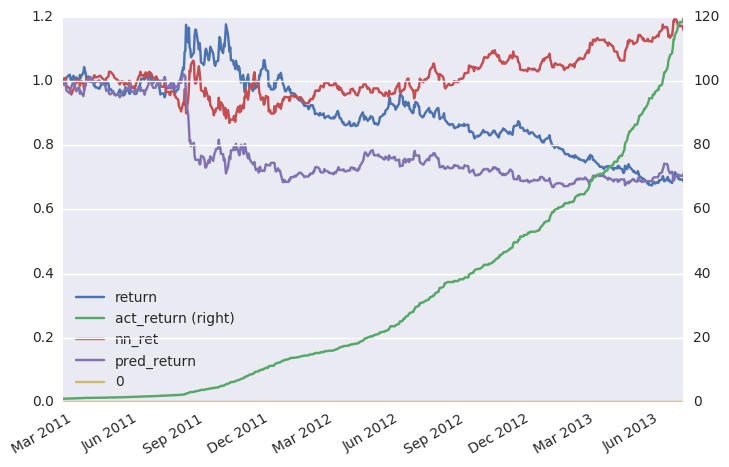

In [669]:
# https:/onepagecode.substack.com
Res = (1+Result[-test_size:][['return','act_return','nn_ret','pred_return']]).cumprod()
Res[0] =0
Res.plot(secondary_y='act_return')

In [670]:
# https:/onepagecode.substack.com
print(confusion_matrix(Result['class'],Result['mod_nn_prod']))
print(classification_report(Result['class'],Result['mod_nn_prod']))

[[86 32 85]
 [71 39 90]
 [88 19 90]]
             precision    recall  f1-score   support

         -1       0.35      0.42      0.38       203
          0       0.43      0.20      0.27       200
          1       0.34      0.46      0.39       197

avg / total       0.37      0.36      0.35       600



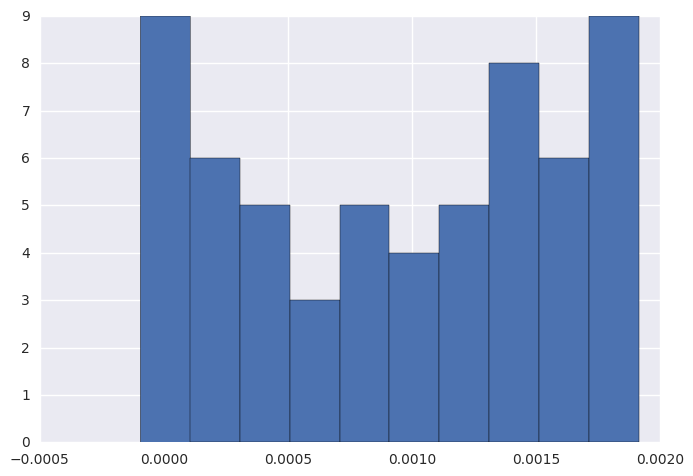

In [557]:
# https:/onepagecode.substack.com
cm = pd.DataFrame(confusion_matrix(Result['multi_class'],Result['nn_pred']))
Result[Result.multi_class==6]['return'].hist()

In [560]:
# https:/onepagecode.substack.com
print(classification_report(Result['multi_class'],Result['nn_pred']))

             precision    recall  f1-score   support

          0       0.29      0.19      0.23        52
          1       0.08      0.10      0.09        50
          2       0.11      0.17      0.13        60
          3       0.00      0.00      0.00        62
          4       0.15      0.08      0.11        50
          5       0.09      0.18      0.12        51
          6       0.09      0.17      0.12        60
          7       0.08      0.02      0.03        53
          8       0.11      0.15      0.12        54
          9       0.13      0.07      0.09        56
         10       0.17      0.13      0.15        52

avg / total       0.12      0.11      0.11       600



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefab1ee1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fefaaf63f60>]], dtype=object)

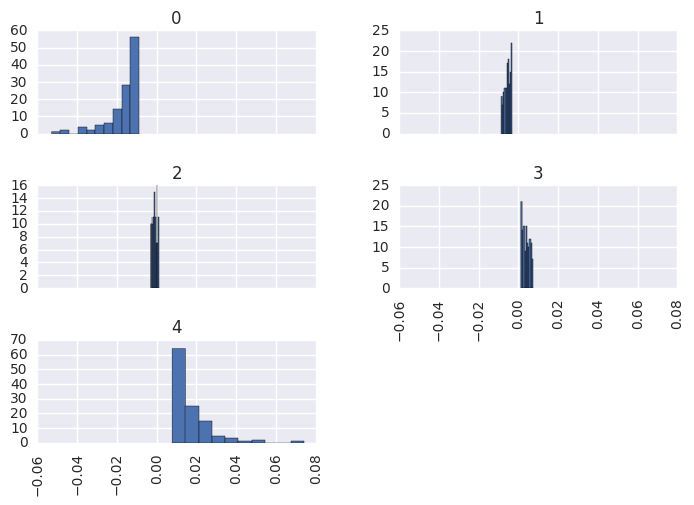

In [499]:
# https:/onepagecode.substack.com
Result.hist(by='multi_class',column='return',sharex=True)

In [687]:
# https:/onepagecode.substack.com
from tensorflow.contrib.layers.python.layers.initializers import xavier_initializer
RNN_HIDDEN_SIZE=100
FIRST_LAYER_SIZE=1000
SECOND_LAYER_SIZE=250
NUM_LAYERS=2
BATCH_SIZE=50
NUM_EPOCHS=200
lr=0.0003
NUM_TRAIN_BATCHES = int(len(train[0])/BATCH_SIZE)
NUM_VAL_BATCHES = int(len(val[1])/BATCH_SIZE)
ATTN_LENGTH=30
beta=0

In [671]:
# https:/onepagecode.substack.com
class RNNModel():
    def __init__(self):
        global_step = tf.contrib.framework.get_or_create_global_step()
        self.input_data = tf.placeholder(dtype=tf.float32,shape=[BATCH_SIZE,num_features])
        self.target_data = tf.placeholder(dtype=tf.int32,shape=[BATCH_SIZE])
        self.dropout_prob = tf.placeholder(dtype=tf.float32,shape=[])
        
        def makeGRUCells():
            base_cell = tf.nn.rnn_cell.GRUCell(num_units=RNN_HIDDEN_SIZE,) 
            layered_cell = tf.nn.rnn_cell.MultiRNNCell([base_cell] * NUM_LAYERS,state_is_tuple=False) 
            attn_cell =tf.contrib.rnn.AttentionCellWrapper(cell=layered_cell,attn_length=ATTN_LENGTH,state_is_tuple=False)
            return attn_cell
        
        self.gru_cell = makeGRUCells()
        self.zero_state = self.gru_cell.zero_state(1, tf.float32)
        
        self.start_state = tf.placeholder(dtype=tf.float32,shape=[1,self.gru_cell.state_size])
        
        

        with tf.variable_scope("ff",initializer=xavier_initializer(uniform=False)):
            droped_input = tf.nn.dropout(self.input_data,keep_prob=self.dropout_prob)
            
            layer_1 = tf.contrib.layers.fully_connected(
                num_outputs=FIRST_LAYER_SIZE,
                inputs=droped_input,
                
            )
            layer_2 = tf.contrib.layers.fully_connected(
                num_outputs=RNN_HIDDEN_SIZE,
                inputs=layer_1,
                
            )
            
        
        split_inputs = tf.reshape(droped_input,shape=[1,BATCH_SIZE,num_features],name="reshape_l1") # Each item in the batch is a time step, iterate through them
        split_inputs = tf.unpack(split_inputs,axis=1,name="unpack_l1")
        states =[]
        outputs =[]
        with tf.variable_scope("rnn",initializer=xavier_initializer(uniform=False)) as scope:
            state = self.start_state
            for i, inp in enumerate(split_inputs):
                if i >0:
                    scope.reuse_variables()
                
                output, state = self.gru_cell(inp, state)
                states.append(state)
                outputs.append(output)
        self.end_state = states[-1]
        outputs = tf.pack(outputs,axis=1) # Pack them back into a single tensor
        outputs = tf.reshape(outputs,shape=[BATCH_SIZE,RNN_HIDDEN_SIZE])
        self.logits = tf.contrib.layers.fully_connected(
            num_outputs=num_classes,
            inputs=outputs,
            activation_fn=None
        )

            
        with tf.variable_scope("loss"):
            self.penalties =    tf.reduce_sum([beta*tf.nn.l2_loss(var) for var in tf.trainable_variables()])

            
            self.losses = tf.nn.sparse_softmax_cross_entropy_with_logits(self.logits,self.target_data)
            self.loss = tf.reduce_sum(self.losses + beta*self.penalties)
        
        with tf.name_scope("train_step"):
          opt = tf.train.AdamOptimizer(lr)
          gvs = opt.compute_gradients(self.loss)
          self.train_op = opt.apply_gradients(gvs, global_step=global_step)
        
        with tf.name_scope("predictions"):
            probs = tf.nn.softmax(self.logits)
            self.predictions = tf.argmax(probs, 1)
            correct_pred = tf.cast(tf.equal(self.predictions, tf.cast(self.target_data,tf.int64)),tf.float64)
            self.accuracy = tf.reduce_mean(correct_pred)

In [688]:
# https:/onepagecode.substack.com
with tf.Graph().as_default():
    model = RNNModel()
    input_ = train[0]
    target = train[1]
    with tf.Session() as sess:
        init = tf.initialize_all_variables()
        sess.run([init])
        loss = 2000
        
        for e in range(NUM_EPOCHS):
            state = sess.run(model.zero_state)
            epoch_loss =0
            for batch in range(0,NUM_TRAIN_BATCHES):
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:input_[start:end],
                    model.target_data:target[start:end],
                    model.dropout_prob:0.5,
                    model.start_state:state
                            }
                _,loss,acc,state = sess.run(
                    [
                        model.train_op,
                        model.loss,
                        model.accuracy,
                        model.end_state
                    ]
                    ,feed_dict=feed
                )
                epoch_loss+=loss
                
            print('step - {0} loss - {1} acc - {2}'.format((e),epoch_loss,acc))
        final_preds =np.array([])
        for batch in range(0,NUM_VAL_BATCHES):
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:val[0][start:end],
                    model.target_data:val[1][start:end],
                    model.dropout_prob:1,
                    model.start_state:state
                            }
                acc,preds,state = sess.run(
                    [
                        model.accuracy,
                        model.predictions,
                        model.end_state
                    ]
                    ,feed_dict=feed
                )
                print(acc)
                assert len(preds) == BATCH_SIZE
                final_preds = np.concatenate((final_preds,preds),axis=0)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step - 0 loss - 8122.736946105957 acc - 0.14
step - 1 loss - 7704.171836853027 acc - 0.14
step - 2 loss - 7474.963249206543 acc - 0.14
step - 3 loss - 7301.8679122924805 acc - 0.16
step - 4 loss - 7132.140953063965 acc - 0.22
step - 5 loss - 6916.858253479004 acc - 0.24
step - 6 loss - 6775.930061340332 acc - 0.32
step - 7 loss - 6526.552337646484 acc - 0.3
step - 8 loss - 6329.640884399414 acc - 0.2
step - 9 loss - 6122.958526611328 acc - 0.38
step - 10 loss - 5956.6852951049805 acc - 0.4
step - 11 loss - 5778.528526306152 acc - 0.3
step - 12 loss - 5716.373748779297 acc - 0.28
step - 13 loss - 5599.946434020996 acc - 0.36
step - 14 loss - 5454.354820251465 acc - 0.24
step - 15 loss - 5270.168941497803 acc - 0.46
step - 16 loss - 5216.21781539917 acc - 0.4
step - 17 loss - 4995.721202850342 acc - 0.5
step - 18 loss - 4818.942836761475 acc - 0.4
step - 19 loss - 4804.370960235596 acc - 0.34
step - 20 loss - 4733.

In [689]:
# https:/onepagecode.substack.com
Result['rnn_pred'] = final_preds
Result['mod_rnn_prod'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,final_preds))
Result['rnn_ret'] = Result.mod_rnn_prod*Result['return']

In [690]:
# https:/onepagecode.substack.com
print(confusion_matrix(Result['multi_class'],Result['rnn_pred']))
print(classification_report(Result['class'],Result['mod_rnn_prod']))
print(confusion_matrix(Result['class'],Result['mod_rnn_prod']))

[[10 10  2  2  2  6  0  5  5  2  8]
 [ 6  1  8  4  5 10  2  5  2  3  4]
 [ 6  3  5  5 13  6  6  4  2  5  5]
 [ 5  4  6  4  7  6  2 10 10  4  4]
 [ 3  2  2  3  8 10  3  8  5  3  3]
 [ 2  3  9  2  7  7  4  7  3  5  2]
 [ 5  2  5  5 10 12  4  5  5  4  3]
 [ 0  5  4  7  6 12  0 10  4  3  2]
 [ 4  5  5  0  6  7  6  7  3  8  3]
 [ 5  3  8  3  3  9  2  7  6  3  7]
 [ 4  4  8  1  4  3  4  6  5  5  8]]
             precision    recall  f1-score   support

         -1       0.37      0.47      0.41       203
          0       0.42      0.18      0.26       200
          1       0.37      0.48      0.42       197

avg / total       0.39      0.38      0.36       600

[[96 25 82]
 [88 37 75]
 [77 26 94]]


In [703]:
# https:/onepagecode.substack.com
(96/(96+82) + 94/(77+94))/2

0.5445167225179053

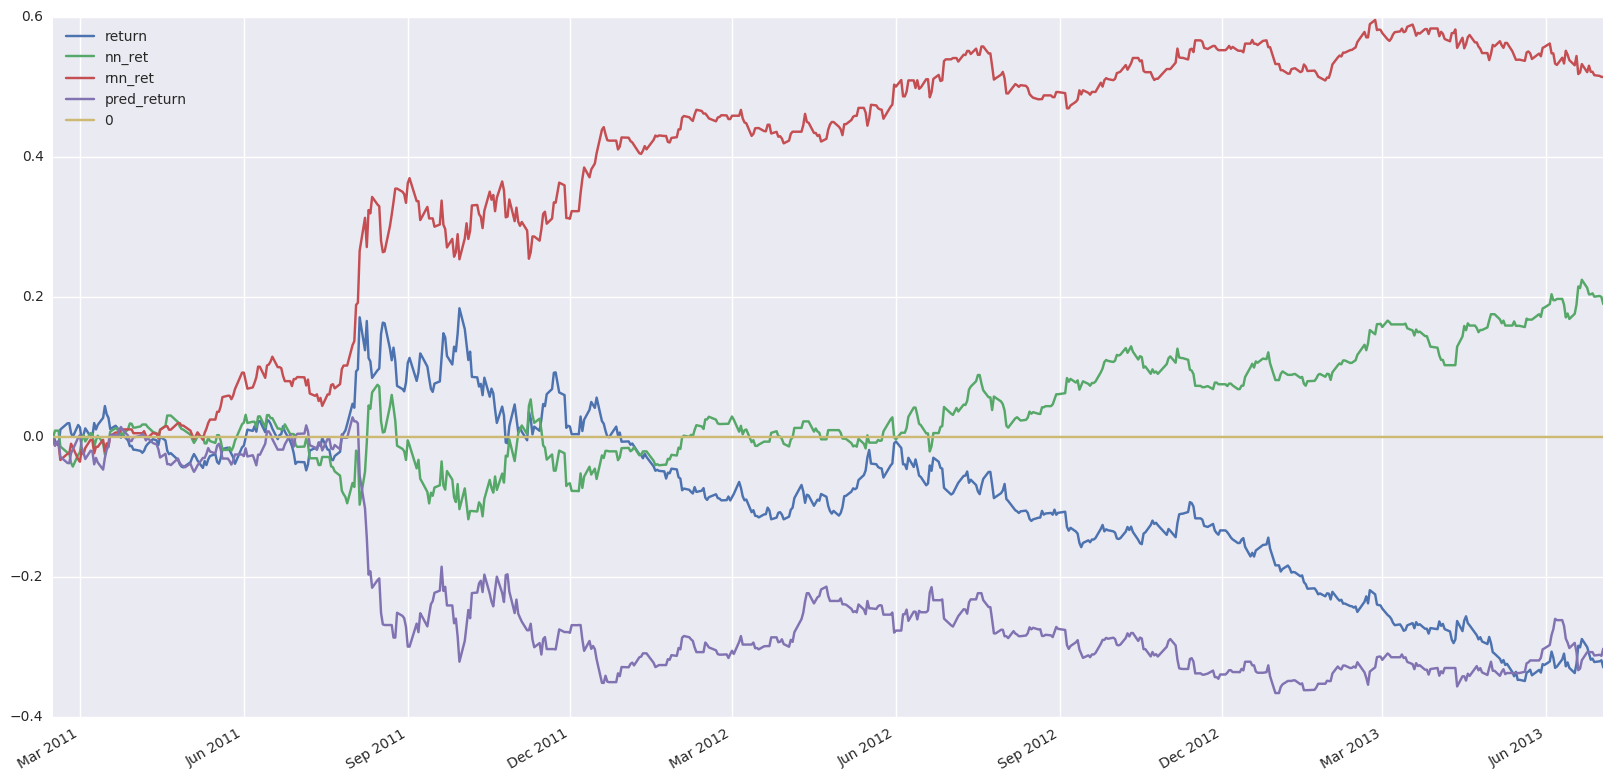

In [695]:
# https:/onepagecode.substack.com
Res = (Result[-test_size:][['return','nn_ret','rnn_ret','pred_return']]).cumsum()
Res[0] =0
Res.plot(figsize=(20,10))

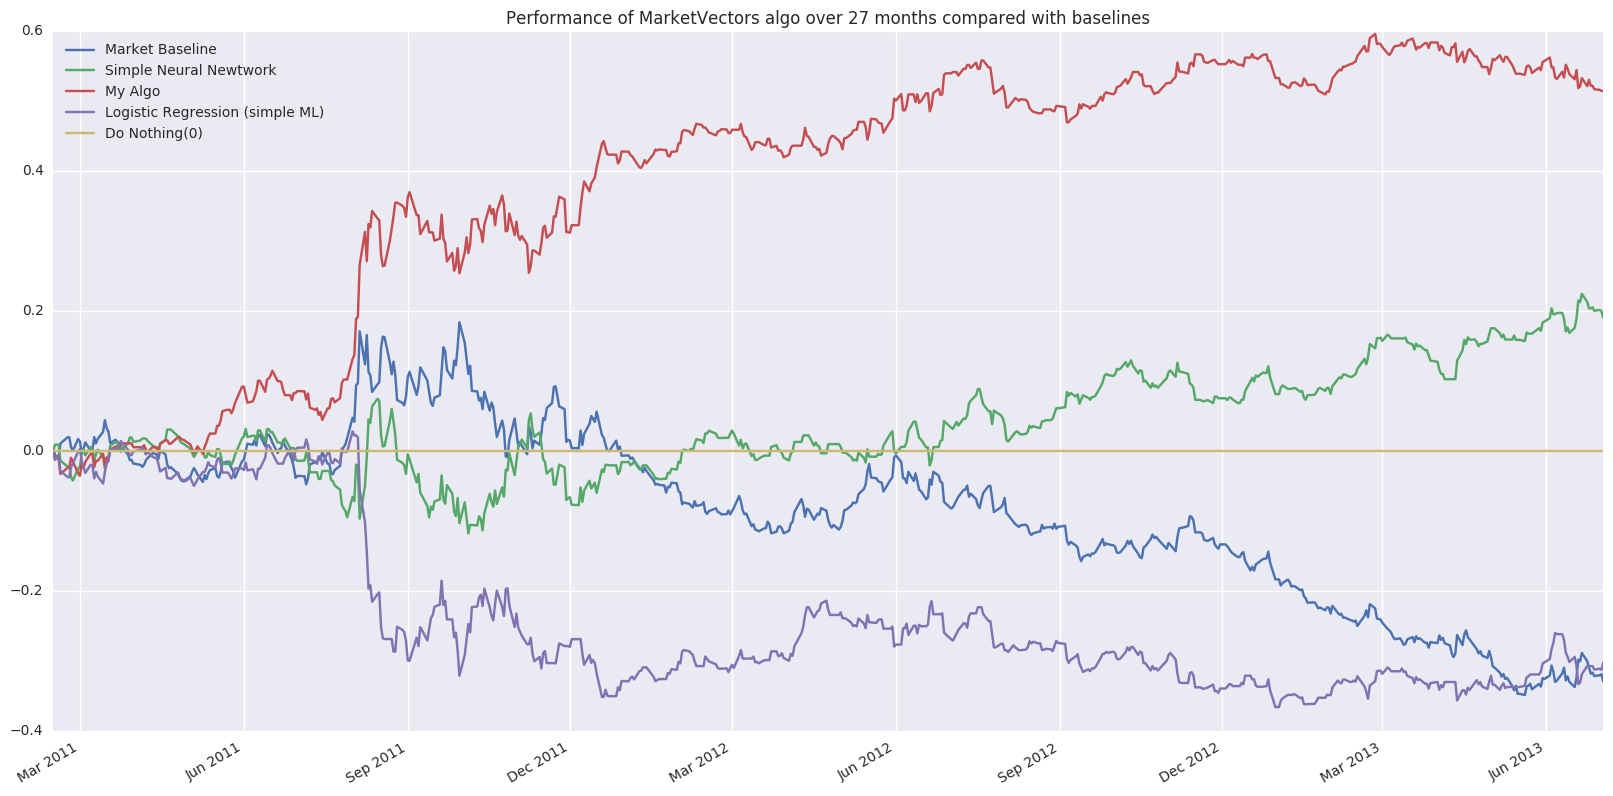

In [700]:
# https:/onepagecode.substack.com
Res.columns =['Market Baseline','Simple Neural Newtwork','My Algo','Logistic Regression (simple ML)','Do Nothing(0)']
Res.plot(figsize=(20,10),title="Performance of MarketVectors algo over 27 months compared with baselines")

In [ ]:
# https:/onepagecode.substack.com
from tensorflow.python.ops.rnn_cell import BasicLSTMCell, GRUCell, MultiRNNCell, DropoutWrapper
cell = tf.nn.rnn_cell.GRUCell(num_units=RNN_HIDDEN_SIZE)
cell = MultiRNNCell(cells=[cell]*NUM_LAYERS,state_is_tuple=True)
attn_cell =tf.contrib.rnn.AttentionCellWrapper(cell=cell,attn_length=ATTN_LENGTH,state_is_tuple=True)
print(attn_cell.zero_state(batch_size=1,dtype=tf.float32))

In [ ]:
# https:/onepagecode.substack.com
model.start_state

In [ ]:
# https:/onepagecode.substack.com
sess = tf.InteractiveSession()

In [ ]:
# https:/onepagecode.substack.com
x = ([1,2,3,4],())
y = sum([1,2,3],())
type(())

In [ ]:
# https:/onepagecode.substack.com
Labeled.hist(column='return',by='class')

In [ ]:
# https:/onepagecode.substack.com
Result['class'].unique()

In [ ]:
# https:/onepagecode.substack.com
import seaborn as sns
g = sns.FacetGrid(Result, row="class", col="rnn_pred", margin_titles=True)
g.map(sns.distplot, "return",);

In [ ]:
# https:/onepagecode.substack.com
Result.hist(by=['class','nn_pred'],column='return',sharex=True)